                    ================DATA EXPLORATION================= 
Nom:Ines Yaici et Céline Daou

Date:11/02/2026

Objectif : Explorer les données de MIMIC-III

In [1]:
# import 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [5]:
#==================================
# 2.Chargements des données 
#==================================
print("chargement des données....")
notes= pd.read_csv('/Users/ines/m-dic-AIde/data/raw/NOTEEVENTS_random.csv')
diagnoses=pd.read_csv('/Users/ines/m-dic-AIde/data/raw/DIAGNOSES_ICD_random.csv')
d_icd_diag =pd.read_csv('/Users/ines/m-dic-AIde/data/raw/D_ICD_DIAGNOSES.csv')
d_icd_proc=pd.read_csv("/Users/ines/m-dic-AIde/data/raw/D_ICD_PROCEDURES.csv")
print("tous les fichiers ont été chargés avec succés")


chargement des données....


/var/folders/rk/lx_hryp913x75xkqm9xb8fd40000gn/T/ipykernel_88149/424036787.py:5: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  notes= pd.read_csv('/Users/ines/m-dic-AIde/data/raw/NOTEEVENTS_random.csv')


tous les fichiers ont été chargés avec succés


In [8]:
# ============================================
# 3. EXPLORATION - NOTEEVENTS (Notes médicales)
# ============================================

print("="*60)
print("EXPLORATION - NOTEEVENTS (Notes médicales)")
print("="*60)
#3.1 Dimensions
print(f"\n Dimensions : {notes.shape[0]:,}lignes x {notes.shape[1]:,} colonnes")

EXPLORATION - NOTEEVENTS (Notes médicales)

 Dimensions : 458,090lignes x 11 colonnes


In [10]:
# 3.2 colonnes et types de données
print("\n Colonnes et types de données :")
print(notes.dtypes)


 Colonnes et types de données :
ROW_ID           int64
SUBJECT_ID       int64
HADM_ID        float64
CHARTDATE       object
CHARTTIME       object
STORETIME       object
CATEGORY        object
DESCRIPTION     object
CGID           float64
ISERROR        float64
TEXT            object
dtype: object


In [11]:
#3.3 Aperçu des premiéres lignes 
print("\n Aperçu des premières lignes :")
print(notes.head(5))


 Aperçu des premières lignes :
   ROW_ID  SUBJECT_ID   HADM_ID   CHARTDATE CHARTTIME STORETIME  \
0     175       13702  107527.0  2118-06-14       NaN       NaN   
1     176       13702  167118.0  2119-05-25       NaN       NaN   
2     177       13702  196489.0  2124-08-18       NaN       NaN   
3     180       20646  134727.0  2112-12-10       NaN       NaN   
4     184       28063  121936.0  2125-02-16       NaN       NaN   

            CATEGORY DESCRIPTION  CGID  ISERROR  \
0  Discharge summary      Report   NaN      NaN   
1  Discharge summary      Report   NaN      NaN   
2  Discharge summary      Report   NaN      NaN   
3  Discharge summary      Report   NaN      NaN   
4  Discharge summary      Report   NaN      NaN   

                                                TEXT  
0  Admission Date:  [**2118-6-2**]       Discharg...  
1  Admission Date:  [**2119-5-4**]              D...  
2  Admission Date:  [**2124-7-21**]              ...  
3  Admission Date:  [**2112-12-8**]   

In [12]:
# 3.4 Valeurs manquantes 
print("\n Valeurs manquantes :")
missing=notes.isnull().sum()
missing_pct=(missing/len(notes))*100
missing_df=pd.DataFrame({
    'Missing':missing,
    'Percentage':missing_pct
})
print(missing_df[missing_df['Missing'] > 0].sort_values('Missing', ascending=False))


 Valeurs manquantes :
           Missing  Percentage
ISERROR     457911   99.960925
STORETIME   182086   39.748958
CGID        182086   39.748958
CHARTTIME    68578   14.970421
HADM_ID      49656   10.839791


In [13]:
# 3.5 Distribution des types de notes 
print("\n Distribution des types de notes :")
category_dist=notes['CATEGORY'].value_counts()
print(category_dist)


 Distribution des types de notes :
CATEGORY
Nursing/other        178980
Radiology            113986
Nursing               50874
ECG                   45121
Physician             32145
Discharge summary     12981
Echo                   9998
Respiratory            7663
Nutrition              2211
General                1902
Rehab Services         1336
Social Work             601
Case Management         231
Pharmacy                 35
Consult                  26
Name: count, dtype: int64


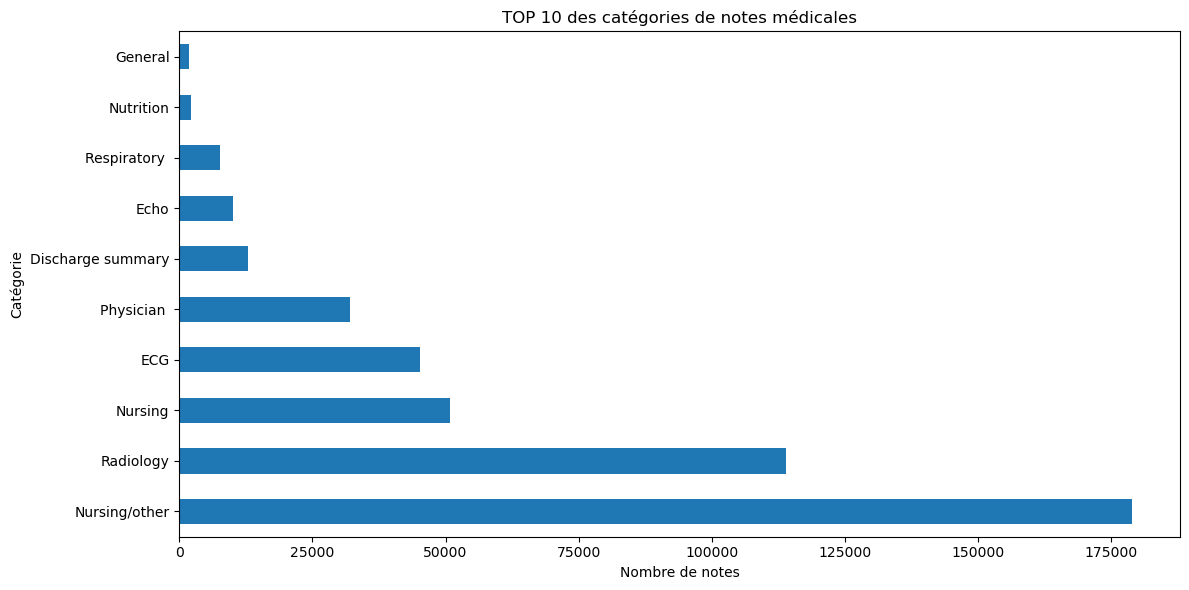

In [14]:
#Visusualisation 
plt.figure(figsize=(12,6))
category_dist.head(10).plot(kind='barh')
plt.title('TOP 10 des catégories de notes médicales')
plt.xlabel("Nombre de notes")
plt.ylabel("Catégorie")
plt.tight_layout()
plt.show()

In [15]:
# 3.6 Longueur des textes
print("\n📏 Statistiques sur la longueur des textes :")
notes['text_length'] = notes['TEXT'].fillna('').str.len()
print(notes['text_length'].describe())


📏 Statistiques sur la longueur des textes :
count    458090.000000
mean       1846.015493
std        2527.032374
min           3.000000
25%         433.000000
50%        1101.000000
75%        1882.000000
max       55728.000000
Name: text_length, dtype: float64


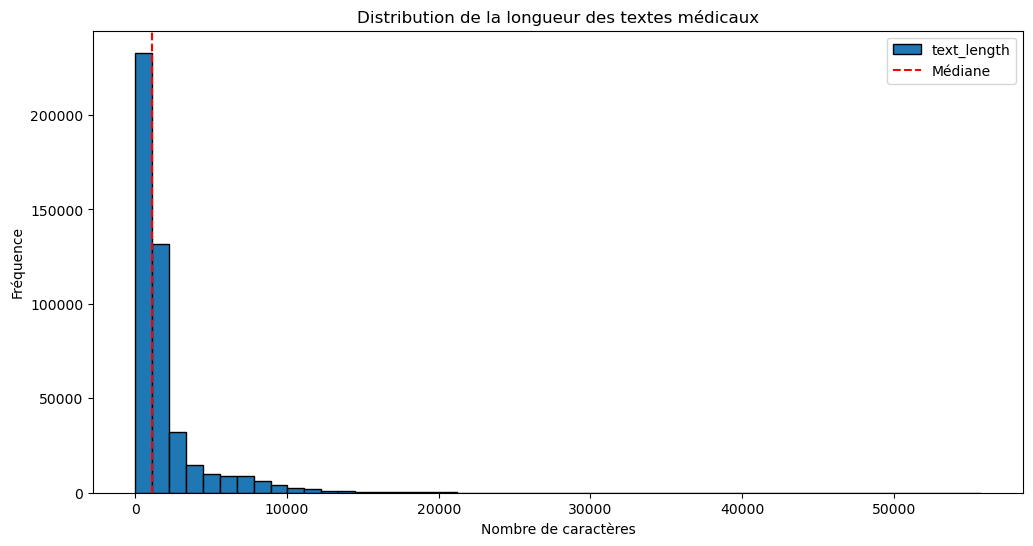

In [16]:
# Visualisation distribution longueurs
plt.figure(figsize=(12, 6))
notes['text_length'].plot(kind='hist', bins=50, edgecolor='black')
plt.title('Distribution de la longueur des textes médicaux')
plt.xlabel('Nombre de caractères')
plt.ylabel('Fréquence')
plt.axvline(notes['text_length'].median(), color='red', linestyle='--', label='Médiane')
plt.legend()
plt.show()

In [17]:
# 3.7 Exemple de NOTE COMPLÈTE
print("\n📝 Exemple de note médicale (Discharge summary) :")
discharge = notes[notes['CATEGORY'] == 'Discharge summary']
if len(discharge) > 0:
    example_text = discharge.iloc[0]['TEXT']
    print(f"\n{example_text[:1000]}...")  # Premiers 1000 caractères
else:
    print("Aucune Discharge summary trouvée")


📝 Exemple de note médicale (Discharge summary) :

Admission Date:  [**2118-6-2**]       Discharge Date:  [**2118-6-14**]

Date of Birth:                    Sex:  F

Service:  MICU and then to [**Doctor Last Name **] Medicine

HISTORY OF PRESENT ILLNESS:  This is an 81-year-old female
with a history of emphysema (not on home O2), who presents
with three days of shortness of breath thought by her primary
care doctor to be a COPD flare.  Two days prior to admission,
she was started on a prednisone taper and one day prior to
admission she required oxygen at home in order to maintain
oxygen saturation greater than 90%.  She has also been on
levofloxacin and nebulizers, and was not getting better, and
presented to the [**Hospital1 18**] Emergency Room.

In the [**Hospital3 **] Emergency Room, her oxygen saturation was
100% on CPAP.  She was not able to be weaned off of this
despite nebulizer treatment and Solu-Medrol 125 mg IV x2.

Review of systems is negative for the following:  Fevers,
c

In [19]:
# 3.8 Nombre de patients uniques
print(f"\n👥 Nombre de patients uniques : {notes['SUBJECT_ID'].nunique():,}")
print(f"👥 Nombre d'hospitalisations uniques : {notes['HADM_ID'].nunique():,}")

# 3.9 Notes par patient
notes_per_patient = notes.groupby('SUBJECT_ID').size()
print(f"\n Notes par patient :")
print(f"  - Moyenne : {notes_per_patient.mean():.1f}")
print(f"  - Médiane : {notes_per_patient.median():.0f}")
print(f"  - Max : {notes_per_patient.max()}")


👥 Nombre de patients uniques : 10,000
👥 Nombre d'hospitalisations uniques : 12,722

 Notes par patient :
  - Moyenne : 45.8
  - Médiane : 21
  - Max : 1414
